<a href="https://colab.research.google.com/github/flaviopradoaquino/TCC_MBA_USP_ESALQ/blob/main/TCC_USP_Teste_Normalidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Instalação e Importação das Bibliotecas**

In [1]:
!pip install prophet
!pip install -q yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf
import datetime
import plotly.express as px
from prophet.plot import plot_plotly, plot_components_plotly
from datetime import date, timedelta
from prophet import Prophet
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error

# **Construção do Dataset**

In [5]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')

In [6]:
from datetime import datetime 
dt_atual = date.today()
td = timedelta(1095)
dt_final = datetime(2023, 3, 3)

In [7]:
### Data de referência menos 1095 dias
df = yf.download("BOVA11.SA", start=(dt_final-td))['Close']

### Data atual menos 1095 dias
# df = yf.download("BOVA11.SA", start=(dt_atual-td))['Close']

### Intervalo de datas fixas
# df = yf.download("BOVA11.SA", start="2020-03-03", end="2023-03-03")['Close']

[*********************100%***********************]  1 of 1 completed


In [8]:
df

Date
2020-03-03    101.750000
2020-03-04    103.099998
2020-03-05     98.790001
2020-03-06     94.400002
2020-03-09     82.699997
                 ...    
2023-03-20     97.699997
2023-03-21     97.930000
2023-03-22     97.029999
2023-03-23     94.580002
2023-03-24     95.730003
Name: Close, Length: 762, dtype: float64

In [9]:
df = df.reset_index()
df

,Date,Close
0,2020-03-03,101.750000
1,2020-03-04,103.099998
2,2020-03-05,98.790001
3,2020-03-06,94.400002
4,2020-03-09,82.699997
...,...,...
757,2023-03-20,97.699997
758,2023-03-21,97.930000
759,2023-03-22,97.029999
760,2023-03-23,94.580002


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    762 non-null    datetime64[ns]
 1   Close   762 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [11]:
df_bova_temp = df[['Date', 'Close']].rename(columns = {'Date': 'ds', 'Close': 'y'})
df_bova_temp

,ds,y
0,2020-03-03,101.750000
1,2020-03-04,103.099998
2,2020-03-05,98.790001
3,2020-03-06,94.400002
4,2020-03-09,82.699997
...,...,...
757,2023-03-20,97.699997
758,2023-03-21,97.930000
759,2023-03-22,97.029999
760,2023-03-23,94.580002


In [12]:
### Alocando somente a data e excluindo uma possível hora inclusa na importação dos dados
df_bova = pd.DataFrame({
  "ds": df_bova_temp['ds'].dt.date,
  "y":df_bova_temp['y']
})

# **Excluindo Outliers**

In [13]:
dados = df_bova['y']
dados.describe()

count    762.000000
mean     104.013980
std       11.464966
min       61.139999
25%       98.352499
50%      105.830002
75%      111.497501
max      125.750000
Name: y, dtype: float64

In [14]:
boxplot_bova = px.box(dados, y="y")
boxplot_bova.show()

In [15]:
q1 = np.quantile(dados, .25, method="midpoint")
q2 = np.quantile(dados, .5, method="midpoint")
q3 = np.quantile(dados, .75, method="midpoint")
IIQ = q3 - q1

In [16]:
### Limite inferior do boxplot
limite_inferior = q1 - 1.5 * IIQ
limite_inferior

78.65999794006348

In [17]:
### Limite superior do boxplot
limite_superior = q3 + 1.5 * IIQ
limite_superior

131.1800022125244

In [18]:
df_bova_lim_inf = df_bova[df_bova['y']>limite_inferior]
df_bova_clean = df_bova_lim_inf[df_bova_lim_inf['y']<limite_superior]
df_bova = df_bova_clean
df_bova


,ds,y
0,2020-03-03,101.750000
1,2020-03-04,103.099998
2,2020-03-05,98.790001
3,2020-03-06,94.400002
4,2020-03-09,82.699997
...,...,...
757,2023-03-20,97.699997
758,2023-03-21,97.930000
759,2023-03-22,97.029999
760,2023-03-23,94.580002


## **Teste de Normalidade**

In [19]:
import scipy.stats as stats

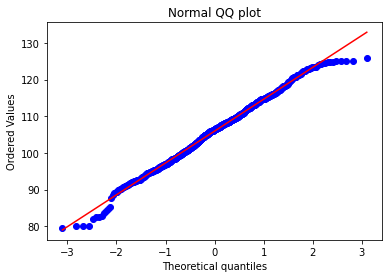

In [20]:
stats.probplot(df_bova['y'], dist="norm", plot=plt)
plt.title("Normal QQ plot")
plt.show()

Teste Shapiro-Wilk

CRITÉRIOS:

NÍVEL DE SIGNIFICÂNCIA DE 0,05 ou 5% (MAIS UTILIZADO)

Ho = distribuição normal p > 0,05

Ha = distribuição não normal p <= 0,05

In [21]:
e, p = stats.shapiro(df_bova['y'])
print('Estatística de teste: {}'.format(e))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9940674901008606
p-valor: 0.006501499097794294


<ipython-input-22-5fa4aacb71a5>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='y', ylabel='Density'>

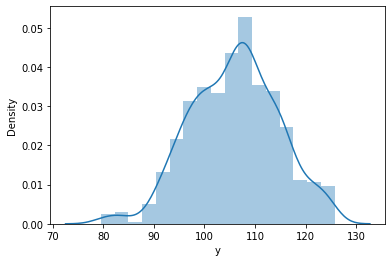

In [22]:
import seaborn as sns
sns.distplot(df_bova['y'])